# Linear Regression

# Phase 0: Intro

We have a dataset containing some features of a group of people. We will try to predict how much they tend to spend on the medical services they receive.

In [3]:
# run this cell to download the dataset
!wget -O /kaggle/working/dataset.csv "https://www.dropbox.com/scl/fi/sy3nij8fkha309jnfi7c4/dataset.csv?rlkey=cjy9gof3hyqx1wo9ali1pusbv&dl=1"

--2023-11-12 23:24:33--  https://www.dropbox.com/scl/fi/sy3nij8fkha309jnfi7c4/dataset.csv?rlkey=cjy9gof3hyqx1wo9ali1pusbv&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb8df6d35bbb1c8d2b57bb2caf1.dl.dropboxusercontent.com/cd/0/inline/CHY_ePS4i1kG17mZ4R_LZ1J3oslo8nML0WGvMbcKZTMpBlcIGCeedykvHsRLcGNAS6vp43R9mVl5156Kc_PwvlziA7ZPq8p_z230rs9dZzmY8vMUtdqDv5-v3rEEvkG7x3qEZ7lgdxuRVdylyHcBXQId/file?dl=1# [following]
--2023-11-12 23:24:34--  https://ucb8df6d35bbb1c8d2b57bb2caf1.dl.dropboxusercontent.com/cd/0/inline/CHY_ePS4i1kG17mZ4R_LZ1J3oslo8nML0WGvMbcKZTMpBlcIGCeedykvHsRLcGNAS6vp43R9mVl5156Kc_PwvlziA7ZPq8p_z230rs9dZzmY8vMUtdqDv5-v3rEEvkG7x3qEZ7lgdxuRVdylyHcBXQId/file?dl=1
Resolving ucb8df6d35bbb1c8d2b57bb2caf1.dl.dropboxusercontent.com (ucb8df6d35bbb1c8d2b57bb2caf1.dl.dropboxusercontent.com)... 162

In [4]:
# libraries that you allowed to use
import os
import pandas
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

# Phase 1: Explore

## Sec 1: Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe.

In [5]:
df = pd.read_csv('dataset.csv')

df.head(5)

,age,sex,bmi,children,smk,region,target
0,46,female,19.95,2,no,northwest,9193.83850
1,47,female,24.32,0,no,northeast,8534.67180
2,52,female,24.86,0,no,southeast,27117.99378
3,39,female,34.32,5,no,southeast,8596.82780
4,54,female,21.47,3,no,northwest,12475.35130


Print the names of the columns and the number of rows of the dataset 

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smk', 'region', 'target'], dtype='object')

In [7]:
len(df.index)

1070

Get a brief description of the dataset 

In [8]:
df.describe()

,age,bmi,children,target
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.357009,30.560397,1.107477,13346.089736
std,14.073960,6.043386,1.215983,12019.510778
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.205000,0.000000,4897.667387
50%,39.500000,30.210000,1.000000,9575.442100
75%,51.000000,34.496250,2.000000,16746.657400
max,64.000000,53.130000,5.000000,62592.873090


Check for missing values in the dataset 

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smk         0
region      0
target      0
dtype: int64

In [10]:
df.isnull()

,age,sex,bmi,children,smk,region,target
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1065,False,False,False,False,False,False,False
1066,False,False,False,False,False,False,False
1067,False,False,False,False,False,False,False
1068,False,False,False,False,False,False,False


Use Histograms and Box-plots to visualize the distribution of numerical columns 

<Axes: xlabel='age', ylabel='children'>

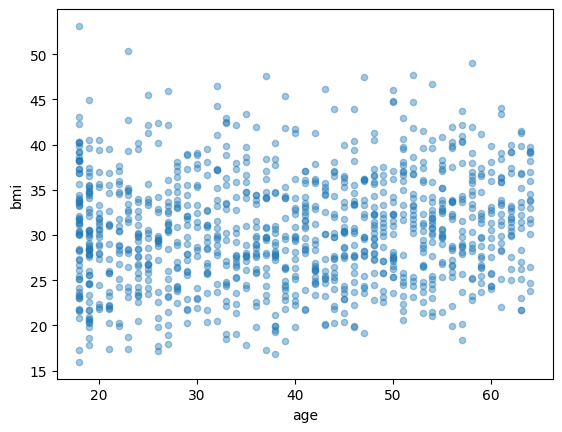

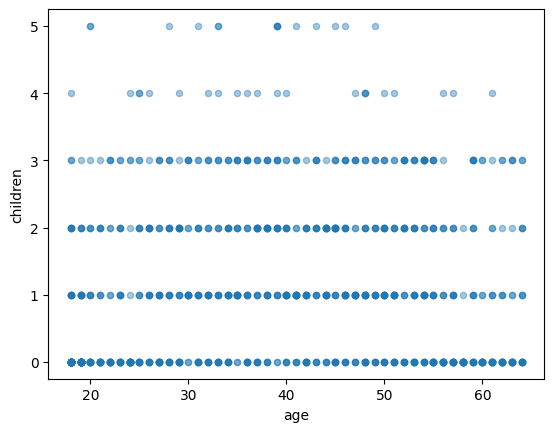

In [11]:
sorted_df = df.sort_values('age')
sorted_df.plot.scatter(x="age", y="bmi",alpha=0.4)
sorted_df.plot.scatter(x="age", y="children",alpha=0.4)

<Axes: >

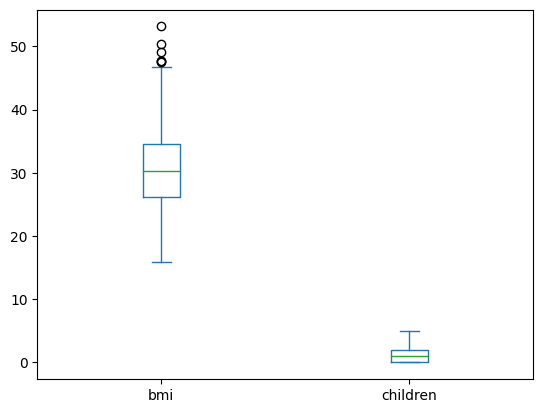

In [12]:
sorted_df = df.sort_values('age')
sorted_df.plot.box(x="age", y=["bmi", "children"])

<Axes: xlabel='age'>

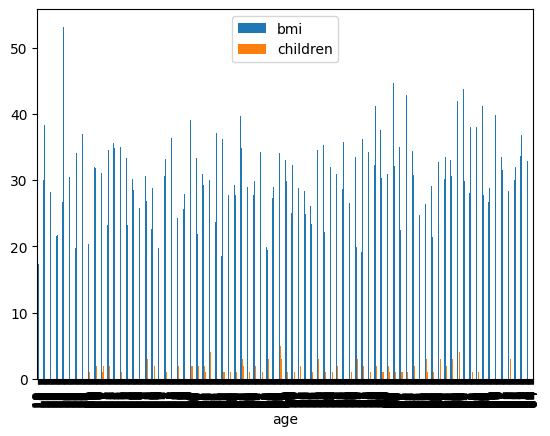

In [13]:
sorted_df = df.sort_values('age')
sorted_df.plot.bar(x="age", y=["bmi", "children"])

<Axes: ylabel='Frequency'>

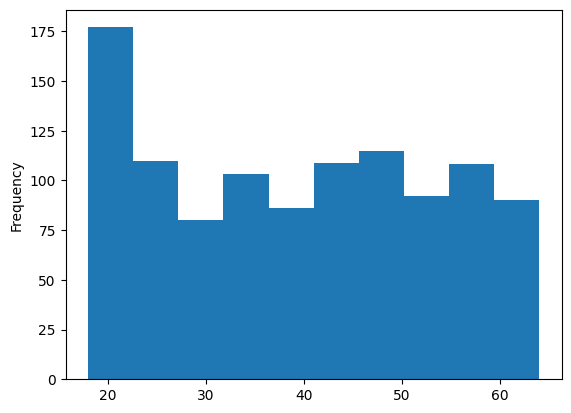

In [14]:
df['age'].plot(kind="hist")

<Axes: ylabel='Frequency'>

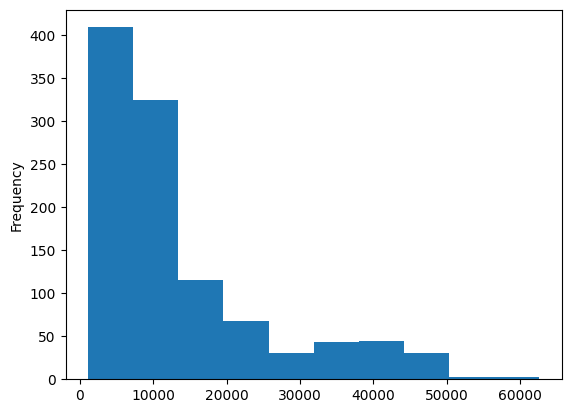

In [15]:
df['target'].plot(kind="hist")

<Axes: ylabel='Frequency'>

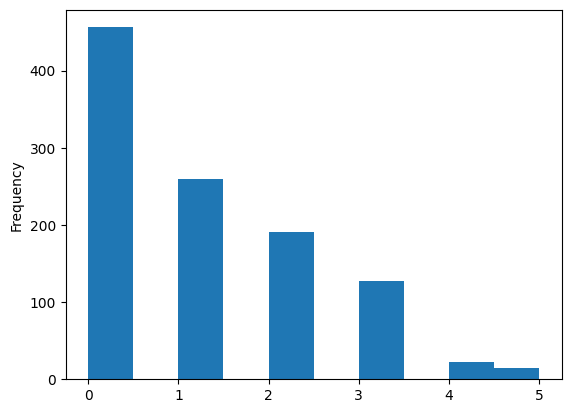

In [16]:
df['children'].plot(kind="hist")

<Axes: ylabel='Frequency'>

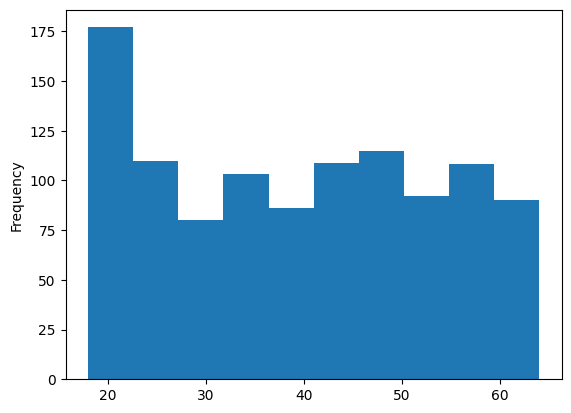

In [17]:
df['age'].plot(kind="hist")

Count the number of unique values for each class in categorical columns and compare the distributions amongst them 

In [18]:
print('age : ' + str(len(pd.unique(df.age))))
print('bmi : ' + str(len(pd.unique(df.bmi))))
print('sex : ' + str(len(pd.unique(df.sex))))
print('region : ' + str(len(pd.unique(df.region))))
print('target : ' + str(len(pd.unique(df.target))))
print('children : ' + str(len(pd.unique(df.children))))

age : 47
bmi : 494
sex : 2
region : 4
target : 1070
children : 6


Convert columns with string values (`sex`, `smk`, and `region`) into numerical values 

In [19]:
df['sex'] = pd.Categorical(df['sex'], categories=df['sex'].unique()).codes
df['smk'] = pd.Categorical(df['smk'], categories=df['smk'].unique()).codes
df['region'] = pd.Categorical(df['region'], categories=df['region'].unique()).codes

df

,age,sex,bmi,children,smk,region,target
0,46,0,19.950,2,0,0,9193.83850
1,47,0,24.320,0,0,1,8534.67180
2,52,0,24.860,0,0,2,27117.99378
3,39,0,34.320,5,0,2,8596.82780
4,54,0,21.470,3,0,0,12475.35130
...,...,...,...,...,...,...,...
1065,18,0,31.350,4,0,1,4561.18850
1066,39,0,23.870,5,0,2,8582.30230
1067,58,1,25.175,0,0,1,11931.12525
1068,37,0,47.600,2,1,3,46113.51100


## Sec 2: Check for linear relation 

Plot `age` and `smk` against `target` 

<Axes: xlabel='target', ylabel='smk'>

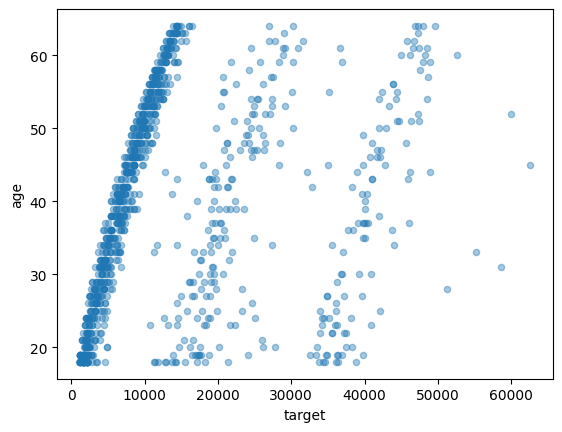

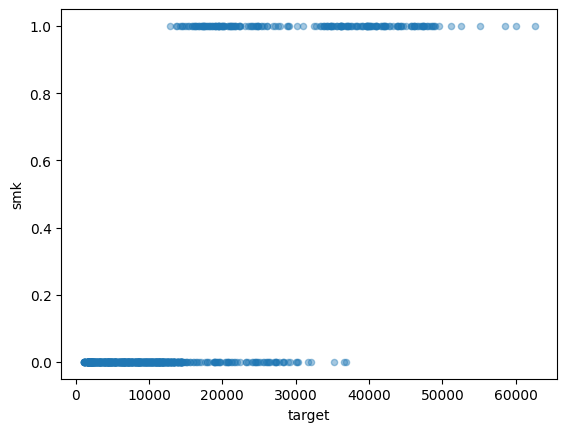

In [20]:
df.plot.scatter(x='target',y='age',alpha=0.4)
df.plot.scatter(x='target',y='smk',alpha=0.4)

Plot the correlation matrix for numerical features 

In [21]:
df.corr()

,age,sex,bmi,children,smk,region,target
age,1.000000,-0.008459,0.118274,0.060999,-0.052035,0.006363,0.281721
sex,-0.008459,1.000000,0.015293,0.017080,0.070908,-0.020711,0.056802
bmi,0.118274,0.015293,1.000000,-0.005040,-0.003450,0.150175,0.197316
children,0.060999,0.017080,-0.005040,1.000000,0.013994,-0.024802,0.071885
smk,-0.052035,0.070908,-0.003450,0.013994,1.000000,0.006042,0.780063
region,0.006363,-0.020711,0.150175,-0.024802,0.006042,1.000000,0.012671
target,0.281721,0.056802,0.197316,0.071885,0.780063,0.012671,1.000000


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='smk', ylabel='age'>,
        <Axes: xlabel='region', ylabel='age'>,
        <Axes: xlabel='target', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='bmi', ylabel='sex'>,
        <Axes: xlabel='children', ylabel='sex'>,
        <Axes: xlabel='smk', ylabel='sex'>,
        <Axes: xlabel='region', ylabel='sex'>,
        <Axes: xlabel='target', ylabel='sex'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='sex', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='smk', ylabel='bmi'>,
        <Axes: xlabel='region', ylabel='bmi'>,
        <Axes: xlabel='target', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='chi

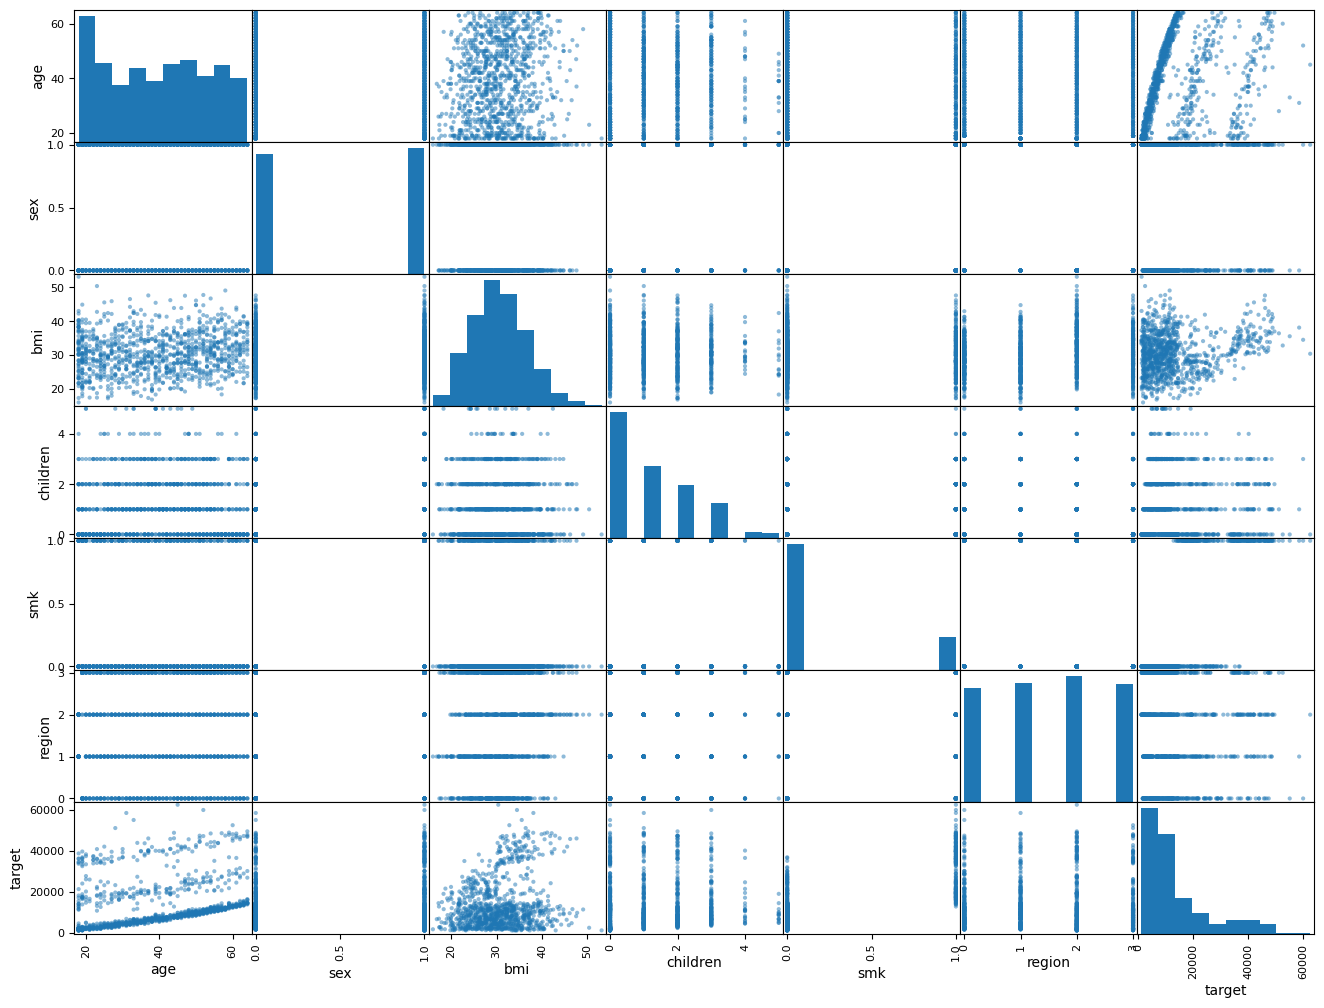

In [22]:
pd.plotting.scatter_matrix(df, figsize=(16, 12))

# Phase 2: Preprocessing

## Sec 1: Handling Categorical Variables 

Using one-hot encoding, convert the `region` variable to some numerical variables (the result should be a dataframe)
<br>
One-hot encoding is a method for converting categorical data to numerical ones that can be fed into a model. This method works by creating a binary vector for each category. 

In [23]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

df['region'] = encoder.fit_transform(df[["region"]]).toarray()


df

,age,sex,bmi,children,smk,region,target
0,46,0,19.950,2,0,1.0,9193.83850
1,47,0,24.320,0,0,0.0,8534.67180
2,52,0,24.860,0,0,0.0,27117.99378
3,39,0,34.320,5,0,0.0,8596.82780
4,54,0,21.470,3,0,1.0,12475.35130
...,...,...,...,...,...,...,...
1065,18,0,31.350,4,0,0.0,4561.18850
1066,39,0,23.870,5,0,0.0,8582.30230
1067,58,1,25.175,0,0,0.0,11931.12525
1068,37,0,47.600,2,1,0.0,46113.51100


Do the same thing for the `smoker` and `sex` variable (the result should be a dataframe) 

In [24]:
df['smk'] = encoder.fit_transform(df[["smk"]]).toarray()
df['sex'] = encoder.fit_transform(df[["sex"]]).toarray()

df

,age,sex,bmi,children,smk,region,target
0,46,1.0,19.950,2,1.0,1.0,9193.83850
1,47,1.0,24.320,0,1.0,0.0,8534.67180
2,52,1.0,24.860,0,1.0,0.0,27117.99378
3,39,1.0,34.320,5,1.0,0.0,8596.82780
4,54,1.0,21.470,3,1.0,1.0,12475.35130
...,...,...,...,...,...,...,...
1065,18,1.0,31.350,4,1.0,0.0,4561.18850
1066,39,1.0,23.870,5,1.0,0.0,8582.30230
1067,58,0.0,25.175,0,1.0,0.0,11931.12525
1068,37,1.0,47.600,2,0.0,0.0,46113.51100


## Sec 2: Normalization 

Normalize the columns `age`, `bmi`, and `children`. After this process, they should take values between 0 and 1. 

In [25]:
from sklearn.preprocessing import MinMaxScaler


min_max_scaler = MinMaxScaler(feature_range = (0, 1))

df[["age", "bmi", "children"]] = min_max_scaler.fit_transform(df[["age", "bmi", "children"]])


df

,age,sex,bmi,children,smk,region,target
0,0.608696,1.0,0.107345,0.4,1.0,1.0,9193.83850
1,0.630435,1.0,0.224913,0.0,1.0,0.0,8534.67180
2,0.739130,1.0,0.239440,0.0,1.0,0.0,27117.99378
3,0.456522,1.0,0.493947,1.0,1.0,0.0,8596.82780
4,0.782609,1.0,0.148238,0.6,1.0,1.0,12475.35130
...,...,...,...,...,...,...,...
1065,0.000000,1.0,0.414044,0.8,1.0,0.0,4561.18850
1066,0.456522,1.0,0.212806,1.0,1.0,0.0,8582.30230
1067,0.869565,0.0,0.247915,0.0,1.0,0.0,11931.12525
1068,0.413043,1.0,0.851224,0.4,0.0,0.0,46113.51100


# Phase 3: Training

## Sec 1: Preparing features and Targets 

Extract only the features from the dataframe by removing the `target` column. <br>
Note: Do not remove the previous dataframe.

In [26]:
#droped_df = df.copy().drop("target", axis=1)
#droped_df

droped_df = df[['age', 'sex', 'bmi', 'children', 'smk', 'region']].copy()

droped_df

,age,sex,bmi,children,smk,region
0,0.608696,1.0,0.107345,0.4,1.0,1.0
1,0.630435,1.0,0.224913,0.0,1.0,0.0
2,0.739130,1.0,0.239440,0.0,1.0,0.0
3,0.456522,1.0,0.493947,1.0,1.0,0.0
4,0.782609,1.0,0.148238,0.6,1.0,1.0
...,...,...,...,...,...,...
1065,0.000000,1.0,0.414044,0.8,1.0,0.0
1066,0.456522,1.0,0.212806,1.0,1.0,0.0
1067,0.869565,0.0,0.247915,0.0,1.0,0.0
1068,0.413043,1.0,0.851224,0.4,0.0,0.0


Convert the new dataframe into a numpy array 

In [27]:
numpy_df = droped_df.to_numpy()

numpy_df

array([[0.60869565, 1.        , 0.10734463, 0.4       , 1.        ,
        1.        ],
       [0.63043478, 1.        , 0.22491256, 0.        , 1.        ,
        0.        ],
       [0.73913043, 1.        , 0.23944041, 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.        , 0.24791499, 0.        , 1.        ,
        0.        ],
       [0.41304348, 1.        , 0.85122411, 0.4       , 0.        ,
        0.        ],
       [0.80434783, 0.        , 0.37503363, 0.        , 1.        ,
        0.        ]])

Get the `target` column from the previous dataframe and convert it to another numpy array named `y

In [28]:
y = df["target"].to_numpy()

y

array([ 9193.8385 ,  8534.6718 , 27117.99378, ..., 11931.12525,
       46113.511  , 10214.636  ])

## Sec 2: Splitting the Data 

Split the dataset into two parts such that the training set (denoted as `x_train` and ‍`y_train`), contains 80% of the samples. 

In [29]:
from sklearn.model_selection import train_test_split


x_train, x_test = train_test_split(droped_df, test_size = 0.2, random_state = 12)
y_train, y_test = train_test_split(df["target"], test_size = 0.2, random_state = 12)

x = pd.concat([x_train, y_train], axis = 1)

x.sort_index(inplace=True)

x

,age,sex,bmi,children,smk,region,target
0,0.608696,1.0,0.107345,0.4,1.0,1.0,9193.83850
1,0.630435,1.0,0.224913,0.0,1.0,0.0,8534.67180
2,0.739130,1.0,0.239440,0.0,1.0,0.0,27117.99378
4,0.782609,1.0,0.148238,0.6,1.0,1.0,12475.35130
5,0.978261,0.0,0.686306,0.0,1.0,0.0,13405.39030
...,...,...,...,...,...,...,...
1065,0.000000,1.0,0.414044,0.8,1.0,0.0,4561.18850
1066,0.456522,1.0,0.212806,1.0,1.0,0.0,8582.30230
1067,0.869565,0.0,0.247915,0.0,1.0,0.0,11931.12525
1068,0.413043,1.0,0.851224,0.4,0.0,0.0,46113.51100


## Sec 3: Linear Regression from Scratch 

Complete this section with your code. 

In [30]:
class MyLinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        """Fit the training data
        Parameters
        ----------
        X : DataFrame, shape = [n_samples, n_features]
            Training samples
        y : list, shape = [n_samples]
            Target values

        No Returns
        """
        X_b = X.copy()
        X_b.insert(0, 'intercept', 1)  # Add a column of ones for the bias term

        X_b_array = X_b.values
        y_array = np.array(y).reshape(-1, 1)

        if len(X_b_array) == len(y_array):
            X_b_transpose = X_b_array.T
            X_b_product = X_b_transpose.dot(X_b_array)
            X_b_inverse = np.linalg.inv(X_b_product)
            self.coefficients = X_b_inverse.dot(X_b_transpose).dot(y_array)
        else:
            raise ValueError("Number of samples in X and y do not match.")

    def predict(self, X):
        """ Predicts the values after the model has been trained.
        Parameters
        ----------
        X : DataFrame, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted values
        """
        X_b = X.copy()
        X_b.insert(0, 'intercept', 1)  

        X_b_array = X_b.values

        y_predict = X_b_array.dot(self.coefficients)

        return y_predict

## Sec 4: Fit the model to training data 

Fit a linear regressor to the data. (Use both regressors - sklearn & from scratch) 

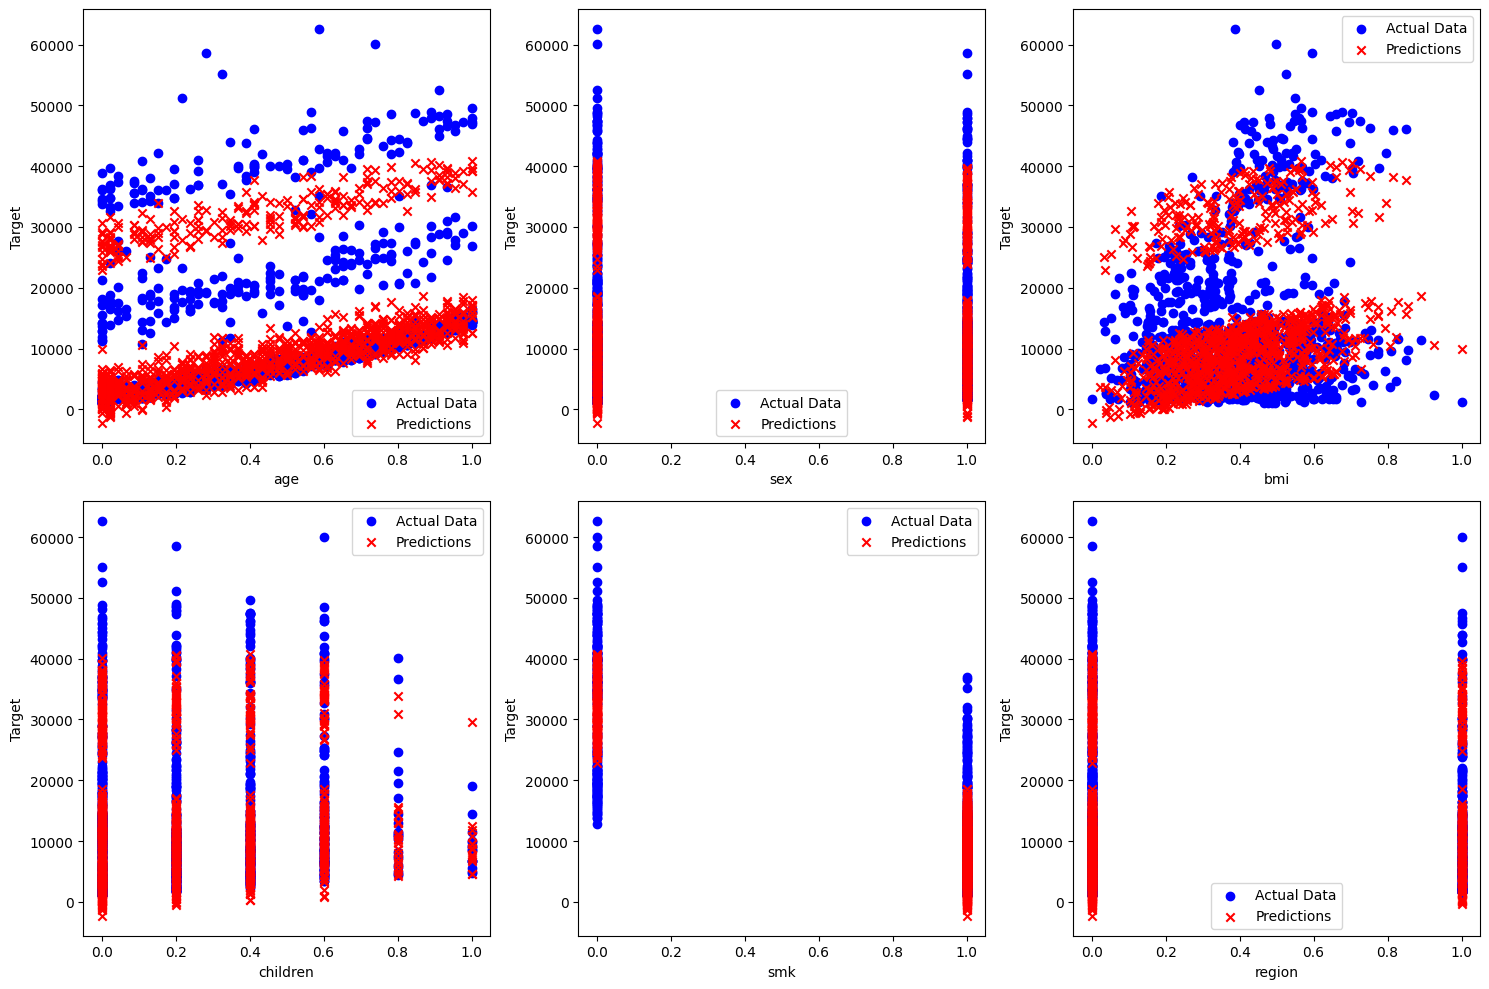

In [31]:
# sklearn

from sklearn import linear_model
import matplotlib.pyplot as plt

model = linear_model.LinearRegression()

model.fit(x_train, y_train)

df['predictions'] = model.predict(df[['age', 'sex', 'bmi', 'children', 'smk', 'region']])

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(['age', 'sex', 'bmi', 'children', 'smk', 'region']):
    axs[i//3, i%3].scatter(df[col], df['target'], label='Actual Data', c='blue', marker='o')
    axs[i//3, i%3].scatter(df[col], df['predictions'], label='Predictions', c='red', marker='x')
    axs[i//3, i%3].set_xlabel(col)
    axs[i//3, i%3].set_ylabel('Target')
    axs[i//3, i%3].legend()

plt.tight_layout()
plt.show()

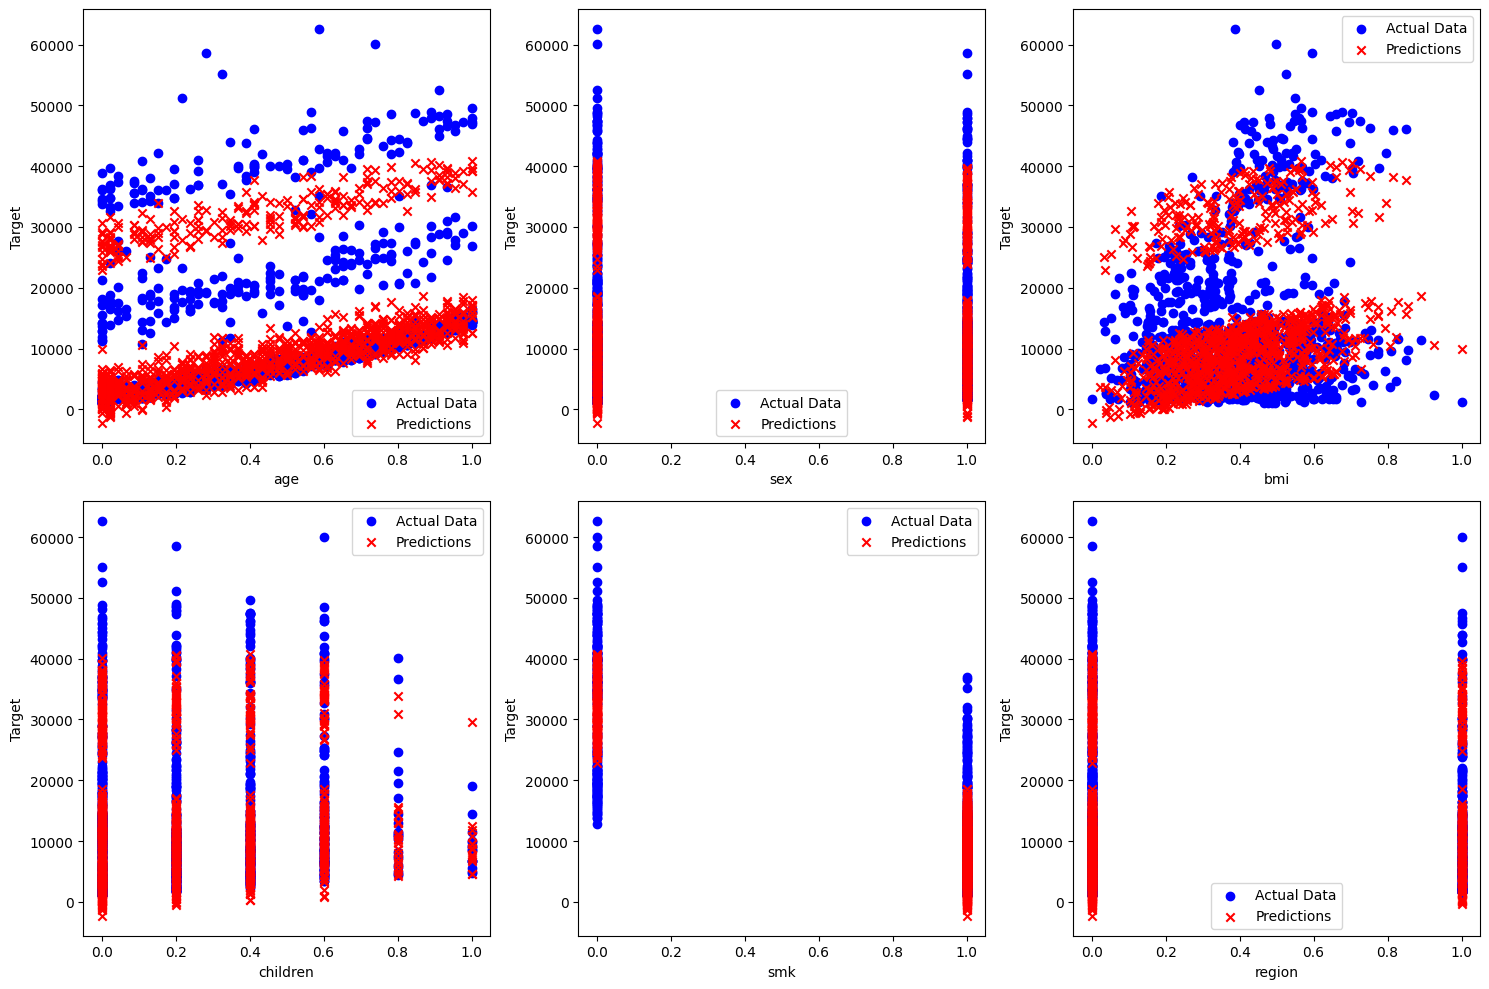

In [32]:
regr = MyLinearRegression()
regr.fit(x_train, y_train)

df['predictions2'] = regr.predict(df[['age', 'sex', 'bmi', 'children', 'smk', 'region']])

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(['age', 'sex', 'bmi', 'children', 'smk', 'region']):
    axs[i//3, i%3].scatter(df[col], df['target'], label='Actual Data', c='blue', marker='o')
    axs[i//3, i%3].scatter(df[col], df['predictions2'], label='Predictions', c='red', marker='x')
    axs[i//3, i%3].set_xlabel(col)
    axs[i//3, i%3].set_ylabel('Target')
    axs[i//3, i%3].legend()

plt.tight_layout()
plt.show()

In [33]:
print('predictions vs real target : ')
df[['target','predictions','predictions2']]


predictions vs real target : 


,target,predictions,predictions2
0,9193.83850,7062.831948,7062.831948
1,8534.67180,7856.551266,7856.551266
2,27117.99378,9279.854046,9279.854046
3,8596.82780,10828.281381,10828.281381
4,12475.35130,9889.497904,9889.497904
...,...,...,...
1065,4561.18850,4285.851917,4285.851917
1066,8582.30230,7380.626007,7380.626007
1067,11931.12525,10689.262960,10689.262960
1068,46113.51100,37796.389161,37796.389161


Get the coefficients of the variables (sklearn) 

In [34]:
coefficients = model.coef_

for feature, coef in zip(x_train.columns, coefficients):
    print(f'{feature}: {coef}')

age: 11455.34711119854
sex: 188.6913359573905
bmi: 12263.095718189741
children: 1664.772649190968
smk: -24083.703301555062
region: 231.147700257887


Get the score value of sklearn regressor on train dataset (sklearn) 

In [35]:
train_score = model.score(x_train, y_train)

print('train score : ' + str(train_score))

train score : 0.7587853692615412


# Phase 4: Evaluation

## Sec 1: Evaluate both models and compare the results 

Predict the value of "y" for each "x" belonging to the "testing" set (use both regressors) 

In [36]:
sklearn_predictions = model.predict(x_test)
mylinearregression_predictions = regr.predict(x_test)

predictions_df = pd.DataFrame({
    'sklearn_pred': sklearn_predictions.flatten(),
    'mylinearregression_pred': mylinearregression_predictions.flatten()
})

print(predictions_df)

     sklearn_pred  mylinearregression_pred
0    24811.794860             24811.794860
1    33246.216476             33246.216476
2    37522.009467             37522.009467
3    26642.827076             26642.827076
4     2085.853549              2085.853549
..            ...                      ...
209  32673.816261             32673.816261
210  10284.713235             10284.713235
211   6703.502954              6703.502954
212  30199.642016             30199.642016
213   5308.004671              5308.004671

[214 rows x 2 columns]


Compute the mean squared error 

In [37]:
from sklearn.metrics import mean_squared_error

mse_sklearn = mean_squared_error(predictions_df['sklearn_pred'], y_test)
mse_mylinearregression = mean_squared_error(predictions_df['mylinearregression_pred'], y_test)

print('MSE for sklearn_predictions: ' + str(mse_sklearn))
print('MSE for mylinearregression_predictions: ' + str(mse_mylinearregression))

MSE for sklearn_predictions: 46320400.44026573
MSE for mylinearregression_predictions: 46320400.44026573


Calculate the maximum error for each regressor 

In [38]:
from sklearn.metrics import max_error

max_err_sklearn = max_error(predictions_df['sklearn_pred'], y_test)
max_err_mylinearregression = max_error(predictions_df['mylinearregression_pred'], y_test)

print('Maximum error for sklearn_predictions: ' + str(max_err_sklearn))
print('Maximum error for mylinearregression_predictions: ' + str(max_err_mylinearregression))


Maximum error for sklearn_predictions: 29346.65661377243
Maximum error for mylinearregression_predictions: 29346.656613772422
